 # Power Load Prediction for West Zone - EDA (Monthly)

In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [13]:
power_data_west = pd.read_csv("westdata_augmented.csv")

/var/folders/7y/xgxlym8j2wvcdq_3kmlw40zm0000gn/T/ipykernel_83242/1727164072.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  power_data_west = pd.read_csv("westdata_augmented.csv")


In [14]:
power_data_west['end'] = pd.to_datetime(power_data_west['end'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['end'])

In [15]:
power_data_west['end'].min()

Timestamp('2019-01-29 00:15:00')

In [16]:
power_data_west['end'].max()

Timestamp('2022-01-25 16:00:00')

In [17]:
power_data_west.head()

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,sfm,index_y,dt,dt_iso,humidity,humidity_temp,pt_date
0,0,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
1,1,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
2,2,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
3,3,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
4,4,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01


In [18]:
power_data_west['month'] = power_data_west['end'].dt.strftime('%b')

In [19]:
from calendar import month_abbr

lower_ma = [m.lower() for m in month_abbr]

# one-liner with Pandas
power_data_west['month_int'] = power_data_west['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [20]:
power_data_west_mod = power_data_west[['end','demand', 'temp', 'humidity', 'month_int']].copy() 

In [21]:
power_data_west_mod.head()

,end,demand,temp,humidity,month_int
0,2019-01-29 00:15:00,844.8,54.0,21,1
1,2019-01-29 00:30:00,841.6,54.0,21,1
2,2019-01-29 00:45:00,832.0,54.0,21,1
3,2019-01-29 01:00:00,848.0,54.0,21,1
4,2019-01-29 01:15:00,812.8,55.0,21,1


In [22]:
power_data_west_mod.describe()

,demand,temp,humidity,month_int
count,104596.000000,104588.00000,104608.000000,104608.00000
mean,1238.634456,67.39232,52.635401,6.54298
std,302.399419,16.59371,22.815913,3.43464
min,0.000000,29.00000,3.000000,1.00000
25%,1008.000000,54.00000,34.000000,4.00000
50%,1232.000000,66.00000,49.000000,7.00000
75%,1472.000000,79.00000,70.000000,10.00000
max,2124.800000,114.00000,100.000000,12.00000


In [23]:
power_data_west_mod.shape

(104608, 5)

In [24]:
power_data_west_monthly = power_data_west_mod.resample('M', on='end').agg({'demand':'sum', 'temp':'max', 'humidity':'max', 'month_int':'max'})

In [25]:
power_data_west_monthly.describe()

,demand,temp,humidity,month_int
count,3.700000e+01,37.000000,37.000000,37.000000
mean,3.501519e+06,92.378378,92.675676,6.351351
std,9.434659e+05,14.234839,8.618630,3.568506
min,2.772160e+05,65.000000,66.000000,1.000000
25%,2.839475e+06,81.000000,92.000000,3.000000
50%,3.485974e+06,91.000000,96.000000,6.000000
75%,4.200819e+06,105.000000,98.000000,9.000000
max,4.855107e+06,114.000000,100.000000,12.000000


In [26]:
power_data_west_mod.replace( np.nan, 0, inplace=True)

In [27]:
power_data_west_monthly

,demand,temp,humidity,month_int
end,,,,
2019-01-31,277216.00,71.0,92,1
2019-02-28,2218374.40,73.0,97,2
2019-03-31,2509120.00,82.0,96,3
2019-04-30,2498371.21,96.0,95,4
2019-05-31,3713468.80,91.0,100,5
2019-06-30,4560950.40,107.0,82,6
2019-07-31,4615408.00,109.0,72,7
2019-08-31,4078729.60,107.0,81,8
2019-09-30,3485974.40,102.0,95,9


dataset.kW.plot()

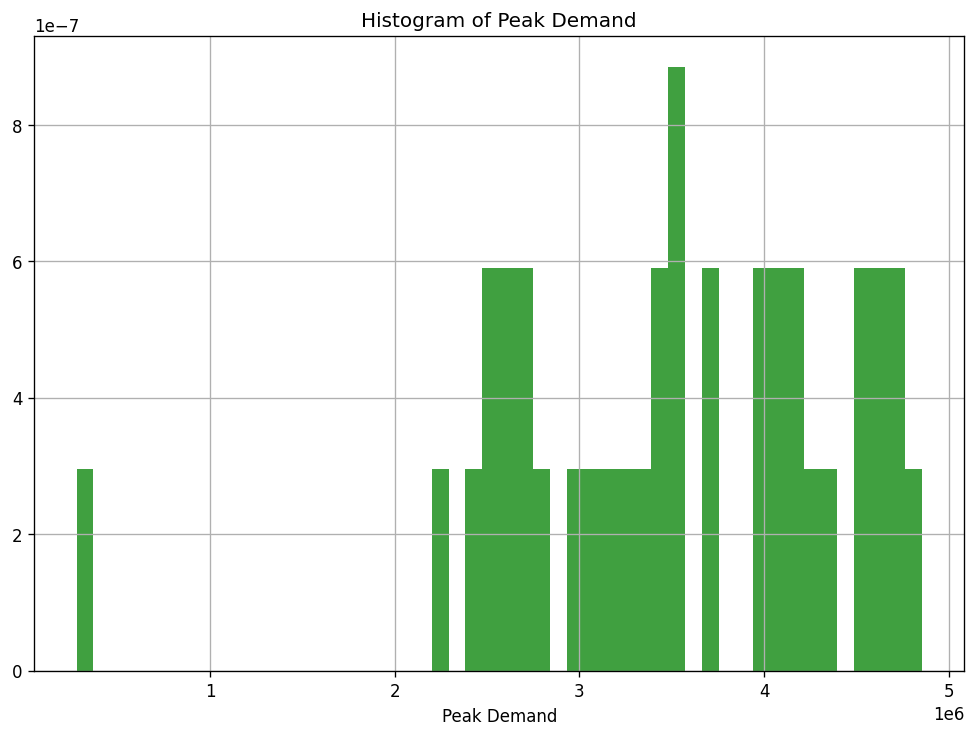

In [28]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_monthly['demand'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Peak Demand')
plt.title('Histogram of Peak Demand')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='end'>

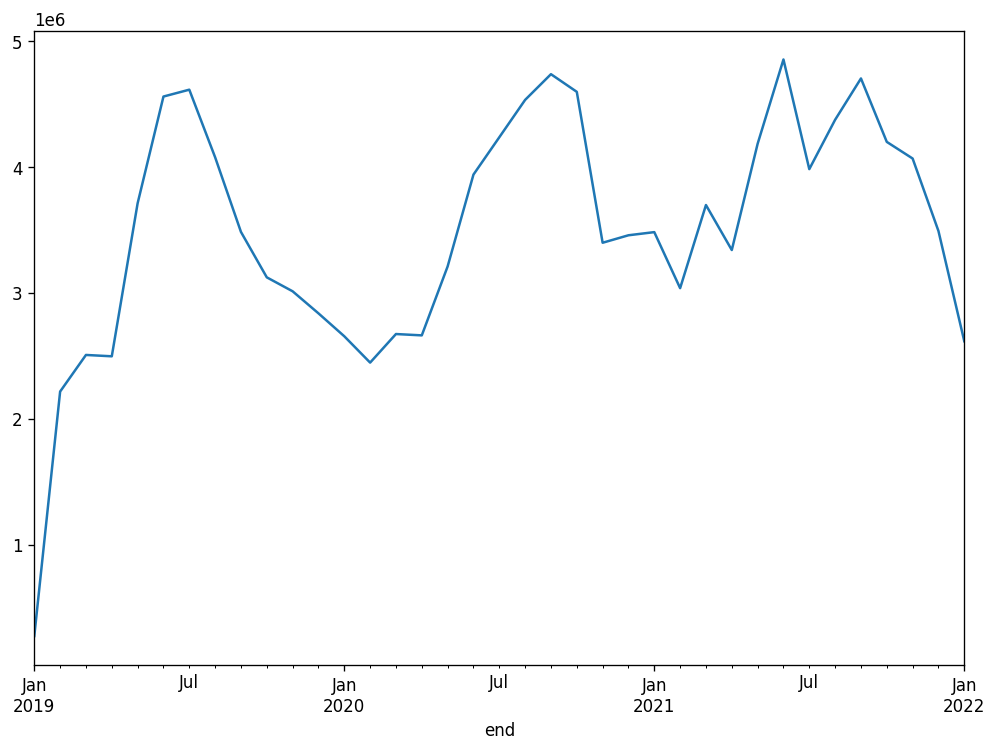

In [29]:
power_data_west_monthly['demand'].plot()

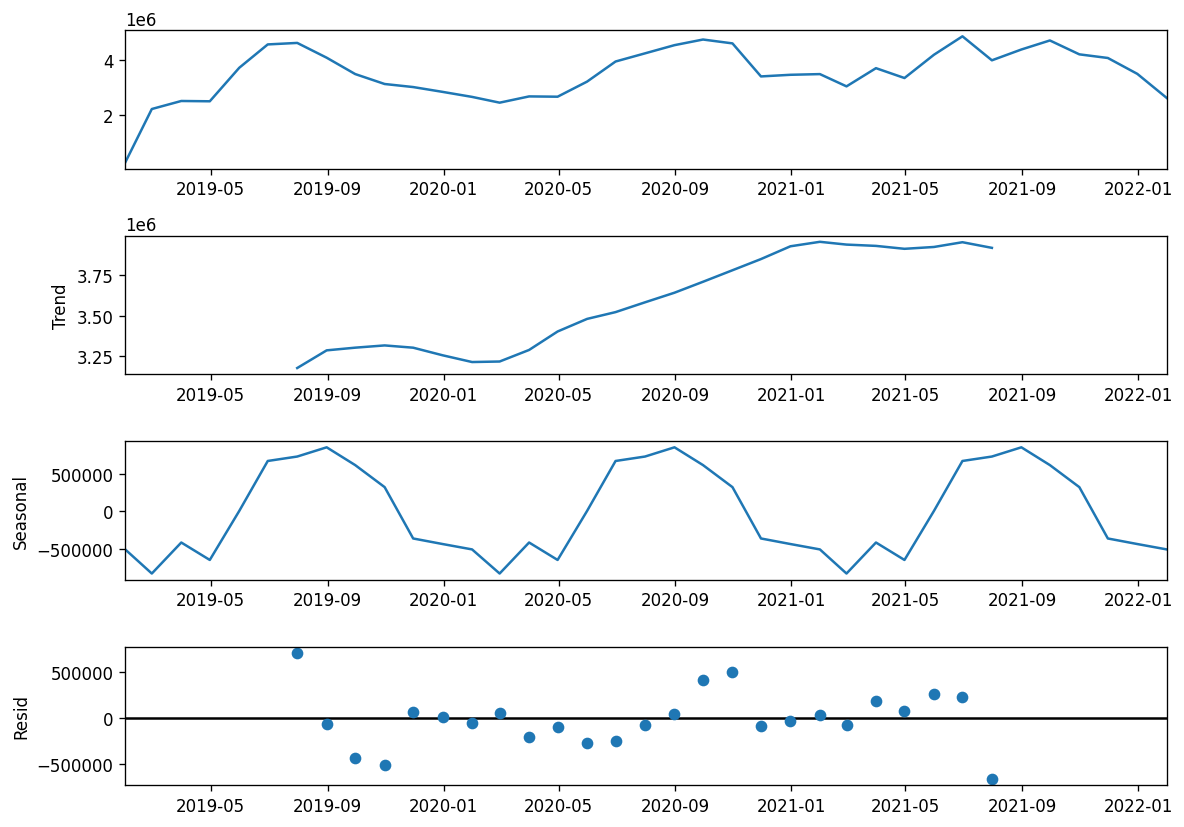

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = pd.DataFrame(power_data_west_monthly, columns=['demand'])
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
plt.show()

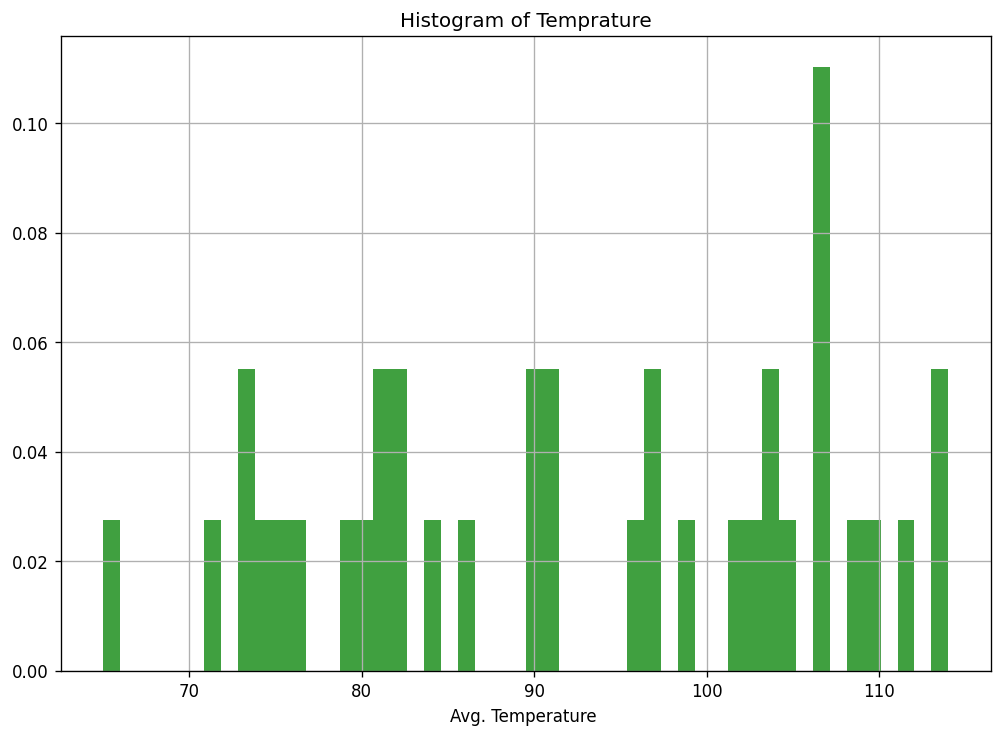

In [32]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_monthly['temp'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Avg. Temperature ')
plt.title('Histogram of Temprature')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='end'>

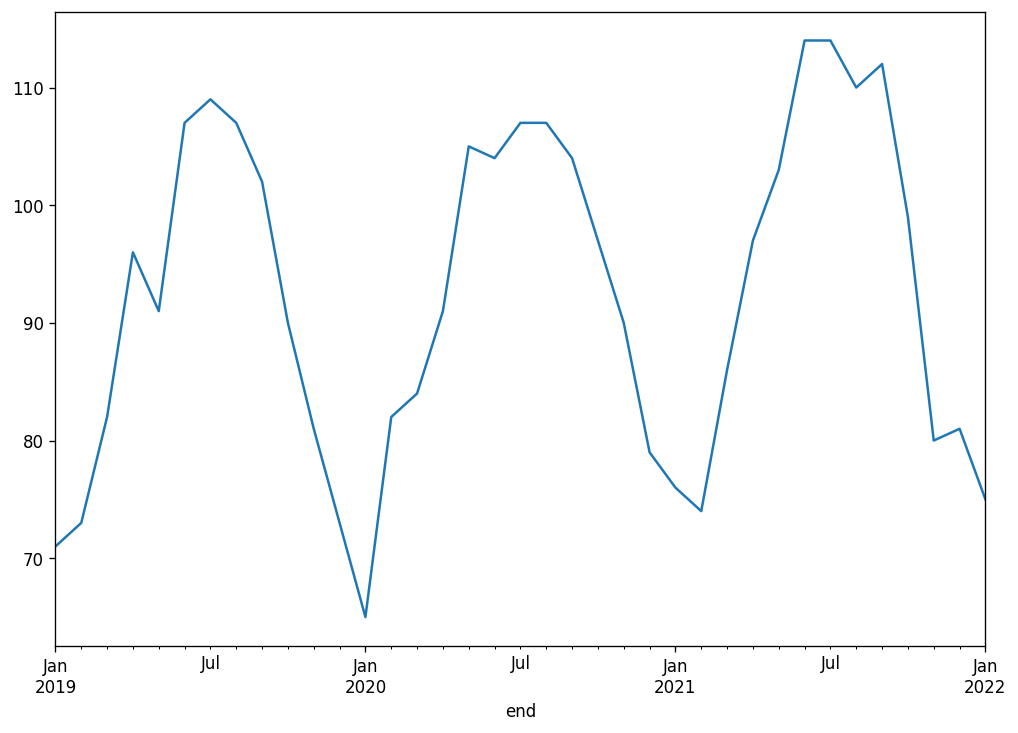

In [33]:
power_data_west_monthly['temp'].plot()

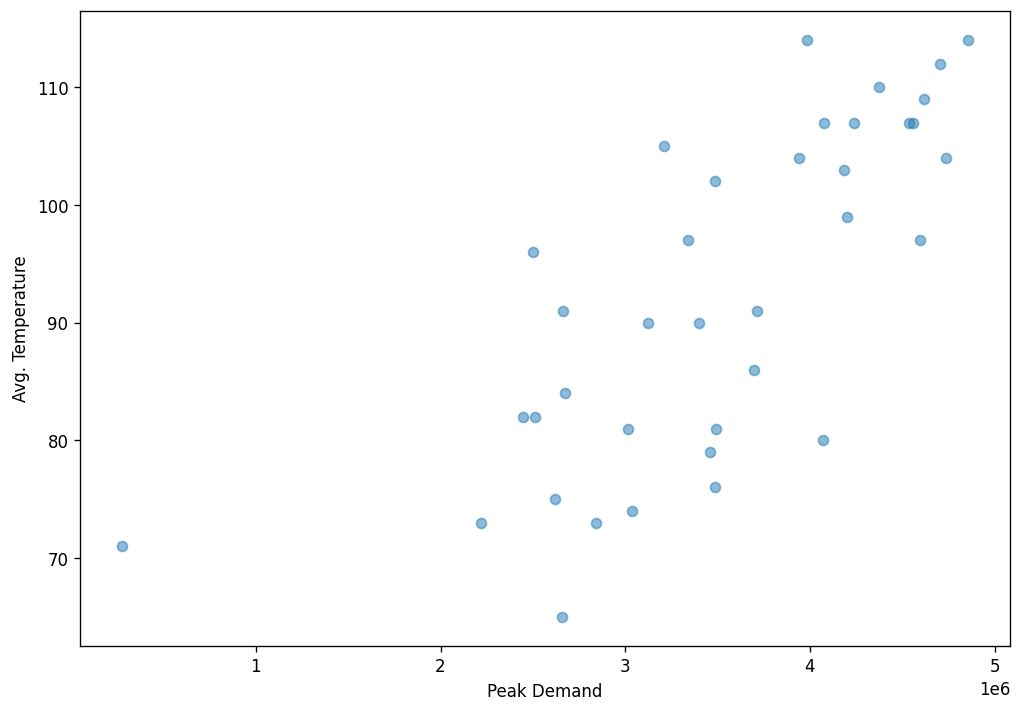

In [34]:
plt.scatter(power_data_west_monthly['demand'], power_data_west_monthly['temp'],  alpha=0.5)
plt.xlabel("Peak Demand")
plt.ylabel("Avg. Temperature")
plt.show()

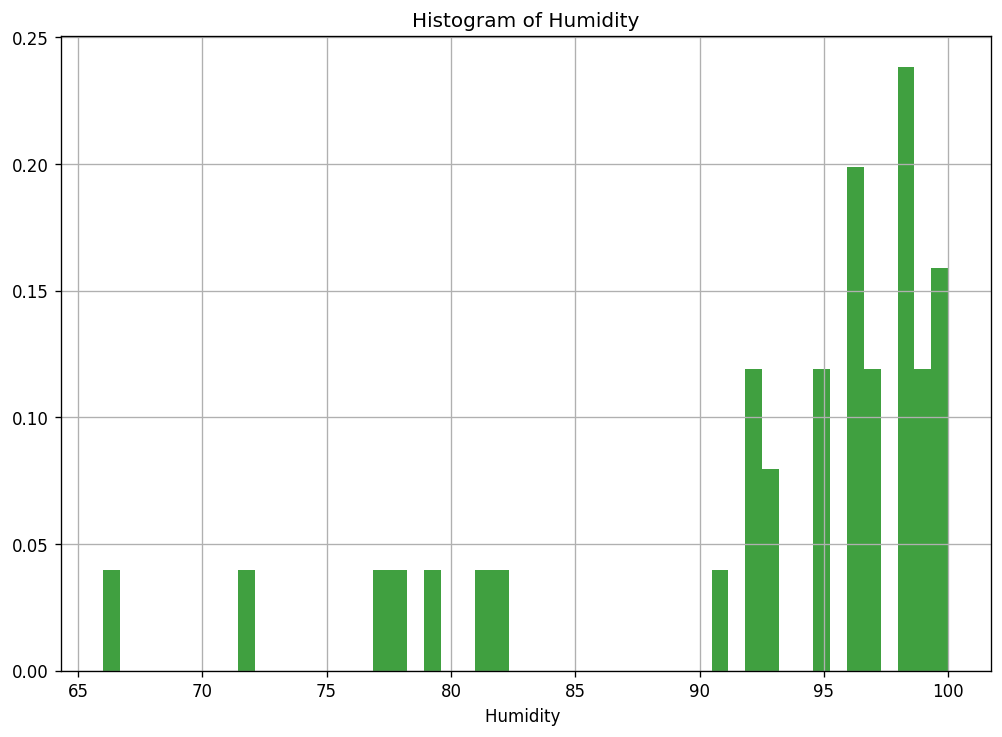

In [35]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(power_data_west_monthly['humidity'], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Humidity ')
plt.title('Histogram of Humidity')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='end'>

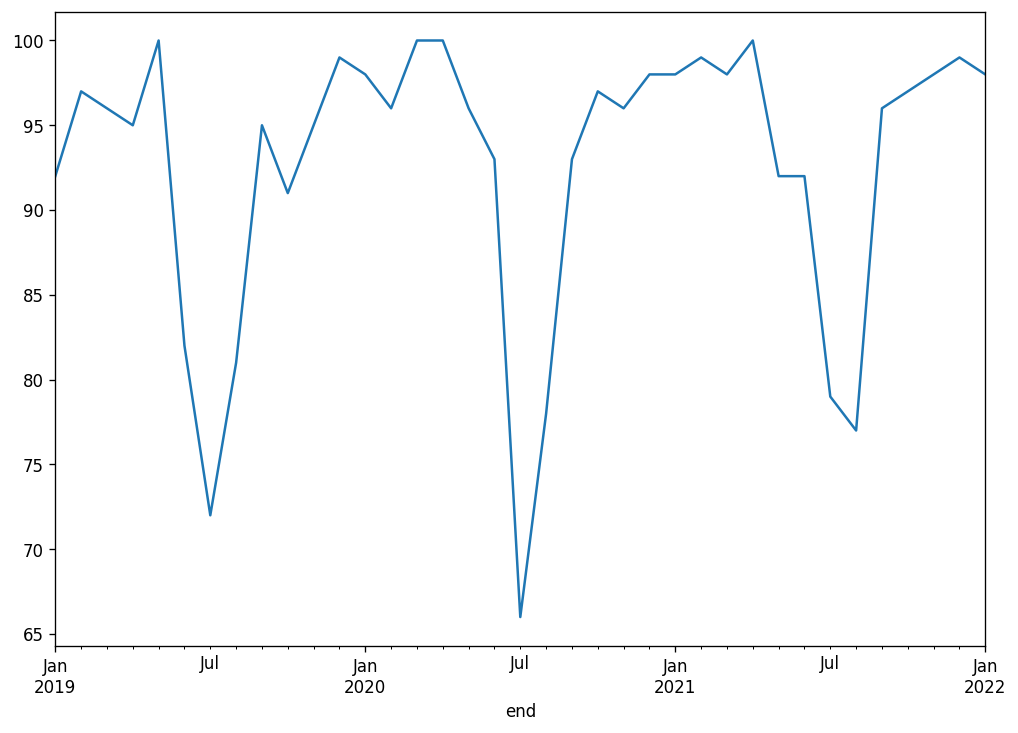

In [36]:
power_data_west_monthly['humidity'].plot()

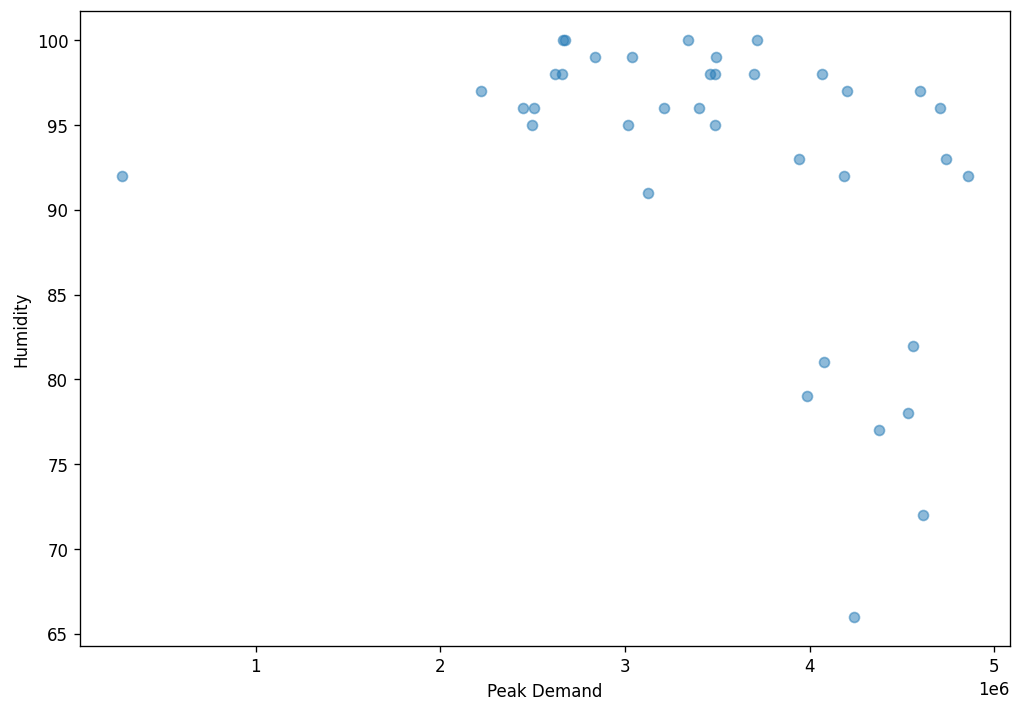

In [37]:
plt.scatter(power_data_west_monthly['demand'], power_data_west_monthly['humidity'],  alpha=0.5)
plt.xlabel("Peak Demand")
plt.ylabel("Humidity")
plt.show()

/Users/diveshkumar/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month_int', ylabel='demand'>

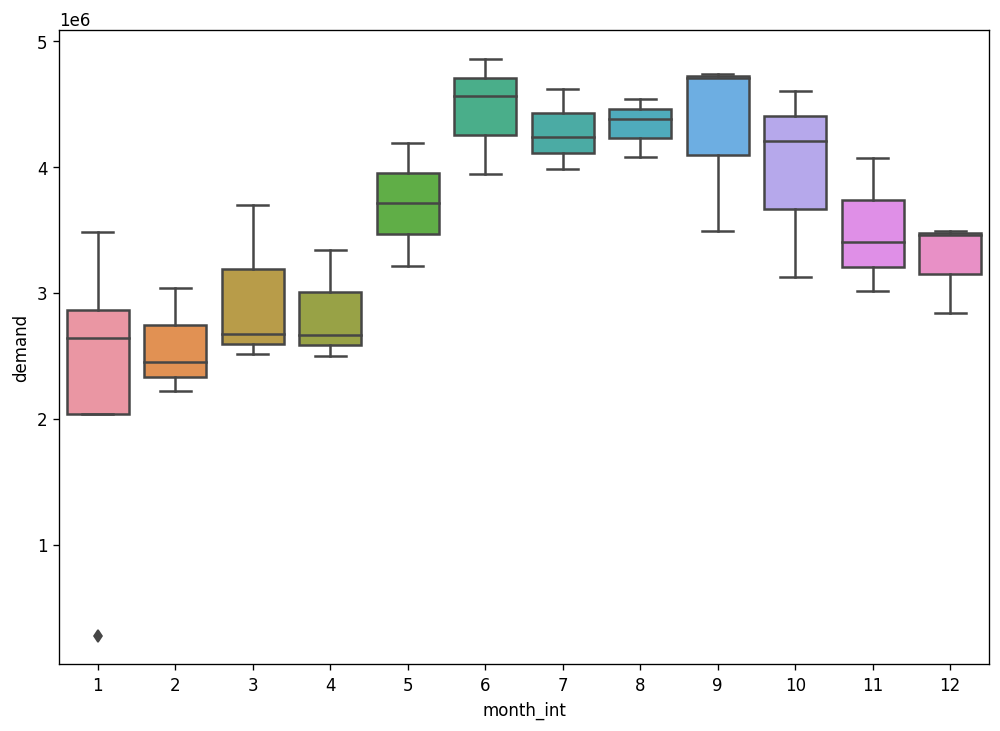

In [38]:
from seaborn import boxplot

boxplot(power_data_west_monthly['month_int'], power_data_west_monthly['demand'])